In [1]:
using Plots,ApproxFun,Interact,Reactive; gadfly();

INFO: Recompiling stale cache file /Users/solver/.julia/lib/v0.4/ApproxFun.ji for module ApproxFun.


    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /Users/solver/.julia/v0.4/Interact/src/IJulia/setup.jl:99
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Any) at replutil.jl:4.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Reactive.Signal)
before the new definition.


# Advection-diffusion with Dirichlet  $$u_t = 0.01 \Delta u -4 u_x -3 u_y$$ $$u(\pm 1,y,t)=u(x,\pm 1,t)=0$$

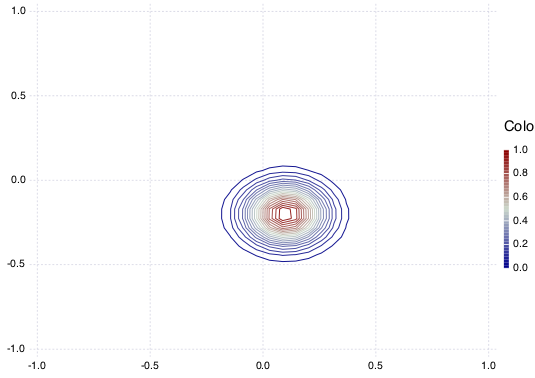

In [4]:
d=Interval()^2
u0   = ProductFun((x,y)->exp(-40(x-.1)^2-40(y+.2)^2),d)
B=dirichlet(d);D=Derivative(Interval())
L=(0.01D^2-4D)⊗I + I⊗(0.01D^2-3D)

glp=Signal(u0);map(f->ApproxFun.contour(f;nlevels=20,xlims=(-1.,1.),ylims=(-1.,1.)).o,glp)

In [5]:
u0=BDF4(B,L,u0,0.002,150,glp);

# Wave equation with Dirichlet  $$u_{tt} = \Delta u$$ $$u(x,y,0)=u_0(x,y), u(\pm 1,y,t)=u(x,\pm 1,t)=0$$

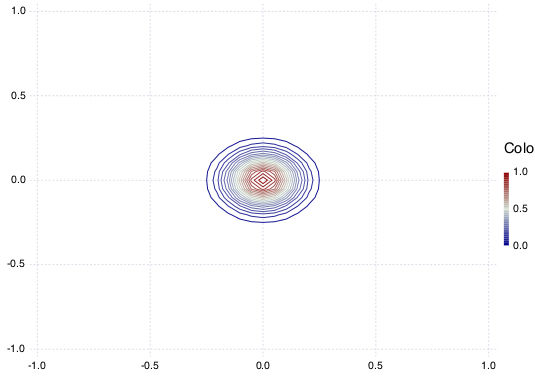

In [6]:
d=Interval()^2
# initial condition
u0   = ProductFun((x,y)->exp(-50x^2-50y^2),d)
B= dirichlet(d);L=lap(d);
glp=Signal(u0);map(f->ApproxFun.contour(f,nlevels=20,xlims=(-1.,1.),ylims=(-1.,1.)).o,glp)

In [7]:
u0=BDF22(B,L,u0,0.004,200,glp);

# Sine Gordon $$u_{tt}=\Delta u - \sin(u)$$

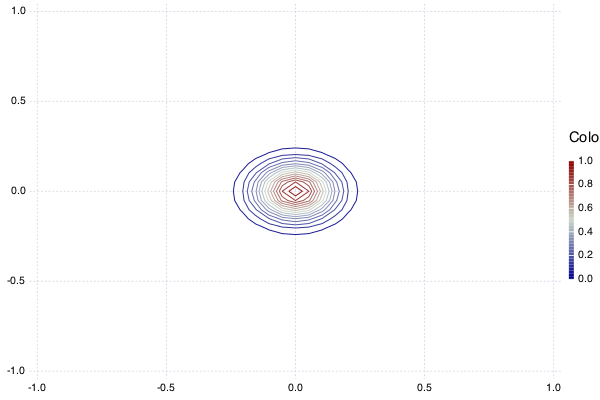

In [11]:
d=Interval()^2
u0   = ProductFun((x,y)->exp(-50x^2-50y^2),d)
B= dirichlet(d);L=lap(d)-I;g(u)=u-sin(u)

glp=Signal(u0);map(u->ApproxFun.contour(u;xlims=(-1.,1.),ylims=(-1.,1.)).o,glp)

In [12]:
u0=BDF22(B,L,g,u0,0.004,300,glp);